In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_csv("Delhi.csv")
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df1.shape

(4998, 40)

In [5]:
df1.groupby("No. of Bedrooms")["No. of Bedrooms"].agg('count')

No. of Bedrooms
1     235
2    1931
3    2277
4     457
5      75
6      13
7       5
8       5
Name: No. of Bedrooms, dtype: int64

In [6]:
#Data slicing - Removing columns after column position 10
df2 = df1.iloc[ :, 0:10] 
df2

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,Madhu Vihar,2,1,9,9,9,9,9
4994,3000000,540,Madhu Vihar,2,1,9,9,9,9,9
4995,2600000,415,Sector 26 Dwarka,1,1,9,9,9,9,9
4996,5500000,415,Sector 26 Dwarka,1,1,9,9,9,9,9


In [7]:
#Dropping rows wheere we have values as NA
df2.isnull().sum()

Price                0
Area                 0
Location             0
No. of Bedrooms      0
Resale               0
MaintenanceStaff     0
Gymnasium            0
SwimmingPool         0
LandscapedGardens    0
JoggingTrack         0
dtype: int64

In [8]:
#Transforming the variables with 0 inplace of NA
df2 = df2.replace(0, "NA")
print(df2.head())
print(df2.shape)
print(df2["Location"].dtype)

      Price  Area          Location  No. of Bedrooms Resale MaintenanceStaff  \
0  10500000  1200  Sector 10 Dwarka                2      1               NA   
1   6000000  1000       Uttam Nagar                3     NA               NA   
2  15000000  1350      Sarita Vihar                2      1               NA   
3   2500000   435       Uttam Nagar                2     NA               NA   
4   5800000   900        Dwarka Mor                3     NA               NA   

  Gymnasium SwimmingPool LandscapedGardens JoggingTrack  
0         1           NA                NA            1  
1        NA           NA                NA           NA  
2        NA           NA                NA           NA  
3        NA           NA                NA           NA  
4        NA           NA                NA           NA  
(4998, 10)
object


In [9]:
#To drop rows with NA values we use dropna() function 

In [10]:
#To check for unique values 
df2['Location'].unique()
#To extract specific values 
filtered_df = df2[df2['Location'] == 'Uttam Nagar'] 
filtered_df


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack
1,6000000,1000,Uttam Nagar,3,NA,NA,NA,NA,NA,NA
3,2500000,435,Uttam Nagar,2,NA,NA,NA,NA,NA,NA
21,6000000,1000,Uttam Nagar,3,NA,NA,NA,NA,NA,NA
23,2500000,435,Uttam Nagar,2,NA,NA,NA,NA,NA,NA
45,5500000,1000,Uttam Nagar,3,NA,1,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...
4979,3200000,600,Uttam Nagar,2,NA,9,9,9,9,9
4980,2300000,750,Uttam Nagar,3,NA,9,9,9,9,9
4981,18000000,600,Uttam Nagar,2,NA,9,9,9,9,9
4989,13500000,562,Uttam Nagar,2,1,9,9,9,9,9


In [11]:
#Adding a new column
df2["BHK"] = df2["No. of Bedrooms"].apply(lambda x : x)
df2

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK
0,10500000,1200,Sector 10 Dwarka,2,1,NA,1,NA,NA,1,2
1,6000000,1000,Uttam Nagar,3,NA,NA,NA,NA,NA,NA,3
2,15000000,1350,Sarita Vihar,2,1,NA,NA,NA,NA,NA,2
3,2500000,435,Uttam Nagar,2,NA,NA,NA,NA,NA,NA,2
4,5800000,900,Dwarka Mor,3,NA,NA,NA,NA,NA,NA,3
...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,Madhu Vihar,2,1,9,9,9,9,9,2
4994,3000000,540,Madhu Vihar,2,1,9,9,9,9,9,2
4995,2600000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,1
4996,5500000,415,Sector 26 Dwarka,1,1,9,9,9,9,9,1


In [12]:
df2["BHK"].unique()

array([2, 3, 4, 1, 5, 6, 8, 7], dtype=int64)

In [13]:
df2[df2["No. of Bedrooms"] > 7][["BHK","Area"]]

,BHK,Area
2912,8,3015
3104,8,12552
3467,8,3500
3534,8,5000
3628,8,5500


In [14]:
df2["Area"].unique

<bound method Series.unique of 0       1200
1       1000
2       1350
3        435
4        900
        ... 
4993     540
4994     540
4995     415
4996     415
4997     900
Name: Area, Length: 4998, dtype: int64>

In [15]:
#To find outliers in the dataset 
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [16]:
#No outliers in the dataset
df2[~(df2["Area"].apply(is_float))]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK


In [17]:
df2.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK
0,10500000,1200,Sector 10 Dwarka,2,1,NA,1,NA,NA,1,2
1,6000000,1000,Uttam Nagar,3,NA,NA,NA,NA,NA,NA,3
2,15000000,1350,Sarita Vihar,2,1,NA,NA,NA,NA,NA,2
3,2500000,435,Uttam Nagar,2,NA,NA,NA,NA,NA,NA,2
4,5800000,900,Dwarka Mor,3,NA,NA,NA,NA,NA,NA,3


In [18]:
#Replacing NA with 
df2 = df2.replace("NA", 0)
df2.head(3)


C:\Users\HP\AppData\Local\Temp\ipykernel_14256\1936324267.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace("NA", 0)


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,2
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,3
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,2


In [19]:
#Creating a new column - Price per sq feet
df3 = df2.copy()
df3["Price_per_sqft"] = df3.apply(lambda row: row["Price"] / row["Area"] if row["Area"] not in [0, None, ""] else None,
    axis=1)
#OR we can simply use
df3["Price_per_sqft"] = df3["Price"]/df3["Area"]
df3["Price_per_sqft"] = df3["Price_per_sqft"].round(1)
df3.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK,Price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,2,8750.0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,3,6000.0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,2,11111.1
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,2,5747.1
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,3,6444.4


In [20]:
len(df3["Location"].unique())
df4 = df3.copy()
df4.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK,Price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,2,8750.0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,3,6000.0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,2,11111.1
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,2,5747.1
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,3,6444.4


In [21]:
#Removing any outliers
df4.Location = df4.Location.apply( lambda x : x.strip())
#Removing Dimensionality curse
Location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
Location_stats

Location
Noida                      761
Uttam Nagar                430
Dwarka Mor                 347
Vasant Kunj                263
Burari                     144
                          ... 
Nanak Heri Village           1
Nanak Pura                   1
Naraina                      1
Naraina Vihar                1
New Ashok Nagar Block E      1
Name: Location, Length: 339, dtype: int64

In [22]:
len(Location_stats.unique())

54

In [23]:
Location_stats.sort_values(ascending = True)

Location
New Ashok Nagar Block E      1
Dwarka 11 Sector             1
Duggal Colony                1
Dharampura                   1
Devli                        1
                          ... 
Burari                     144
Vasant Kunj                263
Dwarka Mor                 347
Uttam Nagar                430
Noida                      761
Name: Location, Length: 339, dtype: int64

In [24]:
len(Location_stats[Location_stats<=10])

266

In [25]:
Other_location = Location_stats[Location_stats<=10]
Other_location

Location
CVD Line                   10
Sector 9 Rohini            10
Sheikh Sarai               10
Kundli                     10
mayur vihar phase 1         9
                           ..
Nanak Heri Village          1
Nanak Pura                  1
Naraina                     1
Naraina Vihar               1
New Ashok Nagar Block E     1
Name: Location, Length: 266, dtype: int64

In [26]:
len(df4["Location"].unique())

339

In [27]:
df4.Location = df4.Location.apply(lambda x : "Other" if x in Other_location else x)
len(df4["Location"].unique())

74

In [28]:
df4.head(10)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK,Price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,2,8750.0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,3,6000.0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,2,11111.1
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,2,5747.1
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,3,6444.4
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,4,8777.8
6,15400000,1500,Sector 6 Dwarka,3,1,0,0,0,0,0,3,10266.7
7,13500000,1800,Sector 5 Dwarka,3,1,0,1,0,0,0,3,7500.0
8,6500000,1000,Sector 23 Rohini,3,0,0,0,0,0,0,3,6500.0
9,12500000,1300,Mayur Vihar II,2,1,0,0,0,0,0,2,9615.4


In [29]:
#We now assume we have a typical 300sqft bedroom in general
df4[df4["Area"]/df4["No. of Bedrooms"]<300]

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK,Price_per_sqft
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,2,5747.1
13,12500000,600,Sector 12 Dwarka,3,1,0,0,0,0,0,3,20833.3
23,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,2,5747.1
33,12500000,600,Sector 12 Dwarka,3,1,0,0,0,0,0,3,20833.3
52,3500000,675,Bindapur,3,1,0,0,0,0,0,3,5185.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4980,2300000,750,Uttam Nagar,3,0,9,9,9,9,9,3,3066.7
4989,13500000,562,Uttam Nagar,2,1,9,9,9,9,9,2,24021.4
4991,15000000,540,Other,2,1,9,9,9,9,9,2,27777.8
4993,2500000,540,Other,2,1,9,9,9,9,9,2,4629.6


In [30]:
#Removing these outliers
df5 = df4[~(df4["Area"]/df4["No. of Bedrooms"]<300)]
df5.shape

(4223, 12)

In [31]:
pd.set_option('future.no_silent_downcasting', True)
df5 = df5.replace("NA", 0)

In [32]:
df5.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,BHK,Price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,2,8750.0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,3,6000.0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,2,11111.1
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,3,6444.4
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,4,8777.8


In [33]:
df5.columns = ['Price','Area','Location','No. of Bedrooms','Resale','Maintenance Staff','Gymnasium','Swimming Pool','Gardens','Track','BHK','Price_per_sqft']

In [34]:
df5.head()

,Price,Area,Location,No. of Bedrooms,Resale,Maintenance Staff,Gymnasium,Swimming Pool,Gardens,Track,BHK,Price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,2,8750.0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,3,6000.0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,2,11111.1
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,3,6444.4
5,15800000,1800,Sector 7 Dwarka,4,1,0,1,1,0,1,4,8777.8


In [35]:
df5.Price_per_sqft.describe()

count      4223.000000
mean      11349.418210
std       27229.692693
min         275.700000
25%        3532.500000
50%        6666.700000
75%       10470.650000
max      615961.500000
Name: Price_per_sqft, dtype: float64

In [36]:
# Function to remove outliers using 2 standard deviations per location
def remove_ppf_outliers(df):
    df_out = []
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        # Filter between mean ± 2 standard deviations
        reduced_df = subdf[(subdf.Price_per_sqft > (m - 2 * st)) &
                           (subdf.Price_per_sqft < (m + 2 * st))]
        df_out.append(reduced_df)  # Append each location's filtered data
    return pd.concat(df_out, ignore_index=True)

# Apply function
df6 = remove_ppf_outliers(df5)
df6.shape

(4065, 12)

In [37]:
df6.Location.unique

<bound method Series.unique of 0       Alaknanda
1       Alaknanda
2       Alaknanda
3       Alaknanda
4       Alaknanda
          ...    
4060       nawada
4061       nawada
4062       nawada
4063       nawada
4064       nawada
Name: Location, Length: 4065, dtype: object>

In [38]:
df6

,Price,Area,Location,No. of Bedrooms,Resale,Maintenance Staff,Gymnasium,Swimming Pool,Gardens,Track,BHK,Price_per_sqft
0,15500000,1200,Alaknanda,3,1,0,0,0,0,0,3,12916.7
1,16399999,1650,Alaknanda,4,1,0,0,0,0,0,4,9939.4
2,15600000,1300,Alaknanda,2,1,0,0,0,0,0,2,12000.0
3,19000000,1450,Alaknanda,3,1,0,0,0,0,0,3,13103.4
4,19000000,1450,Alaknanda,3,1,0,0,0,0,0,3,13103.4
...,...,...,...,...,...,...,...,...,...,...,...,...
4060,4151000,900,nawada,3,0,0,0,0,0,0,3,4612.2
4061,4500000,900,nawada,3,1,9,9,9,9,9,3,5000.0
4062,5100000,900,nawada,3,1,9,9,9,9,9,3,5666.7
4063,2300000,900,nawada,3,1,9,9,9,9,9,3,2555.6


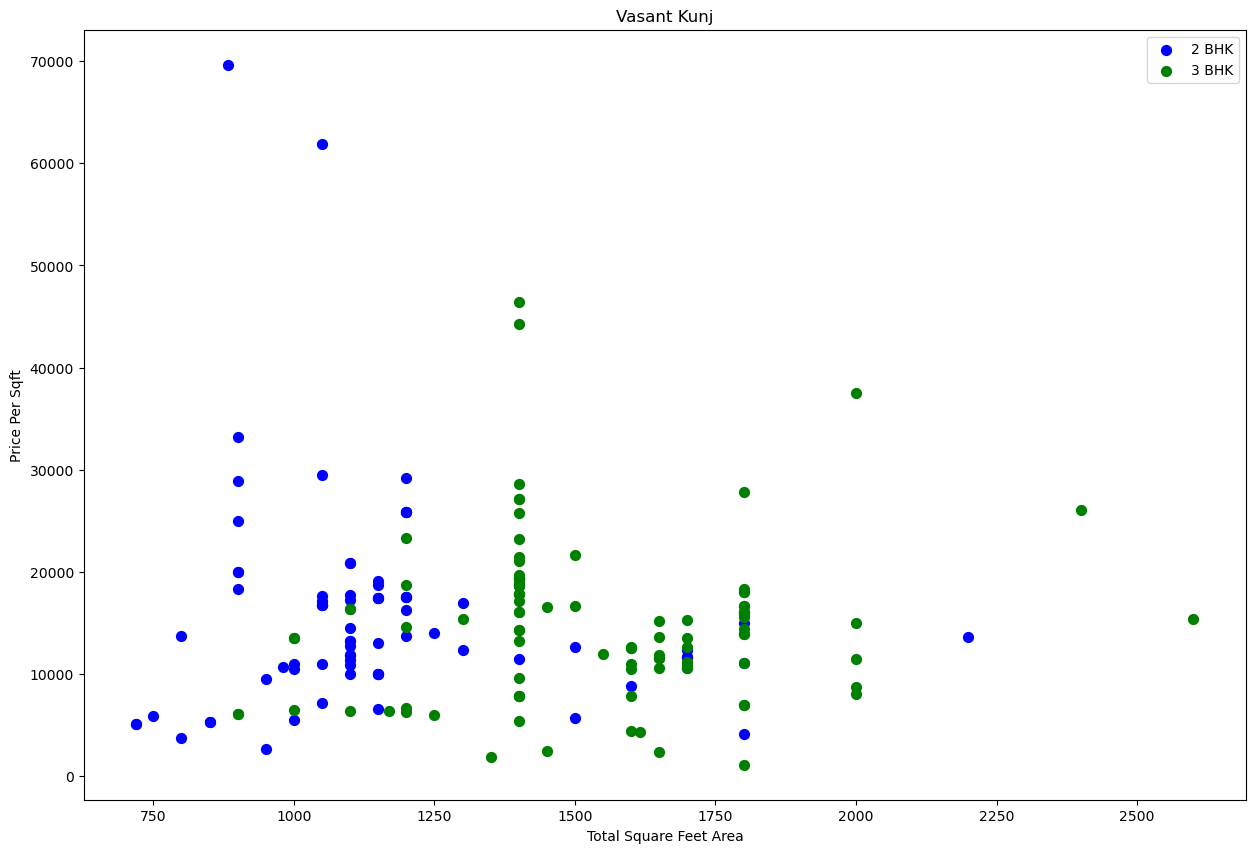

In [39]:
def plot_scatter_chart(df, Location):
    Bhk2 = df[(df.Location == Location) & (df.BHK == 2)]
    Bhk3 = df[(df.Location == Location) & (df.BHK == 3)]

    # Drop rows with missing Area or Price_per_sqft
    Bhk2 = Bhk2.dropna(subset=['Area', 'Price_per_sqft']) 
    Bhk3 = Bhk3.dropna(subset=['Area', 'Price_per_sqft'])

    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(Bhk2.Area, Bhk2.Price_per_sqft, color="Blue", label="2 BHK", s=50)
    plt.scatter(Bhk3.Area, Bhk3.Price_per_sqft, color="Green", label="3 BHK", s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Sqft")
    plt.title(Location)
    plt.legend()
    plt.show()

plot_scatter_chart(df6, "Vasant Kunj")

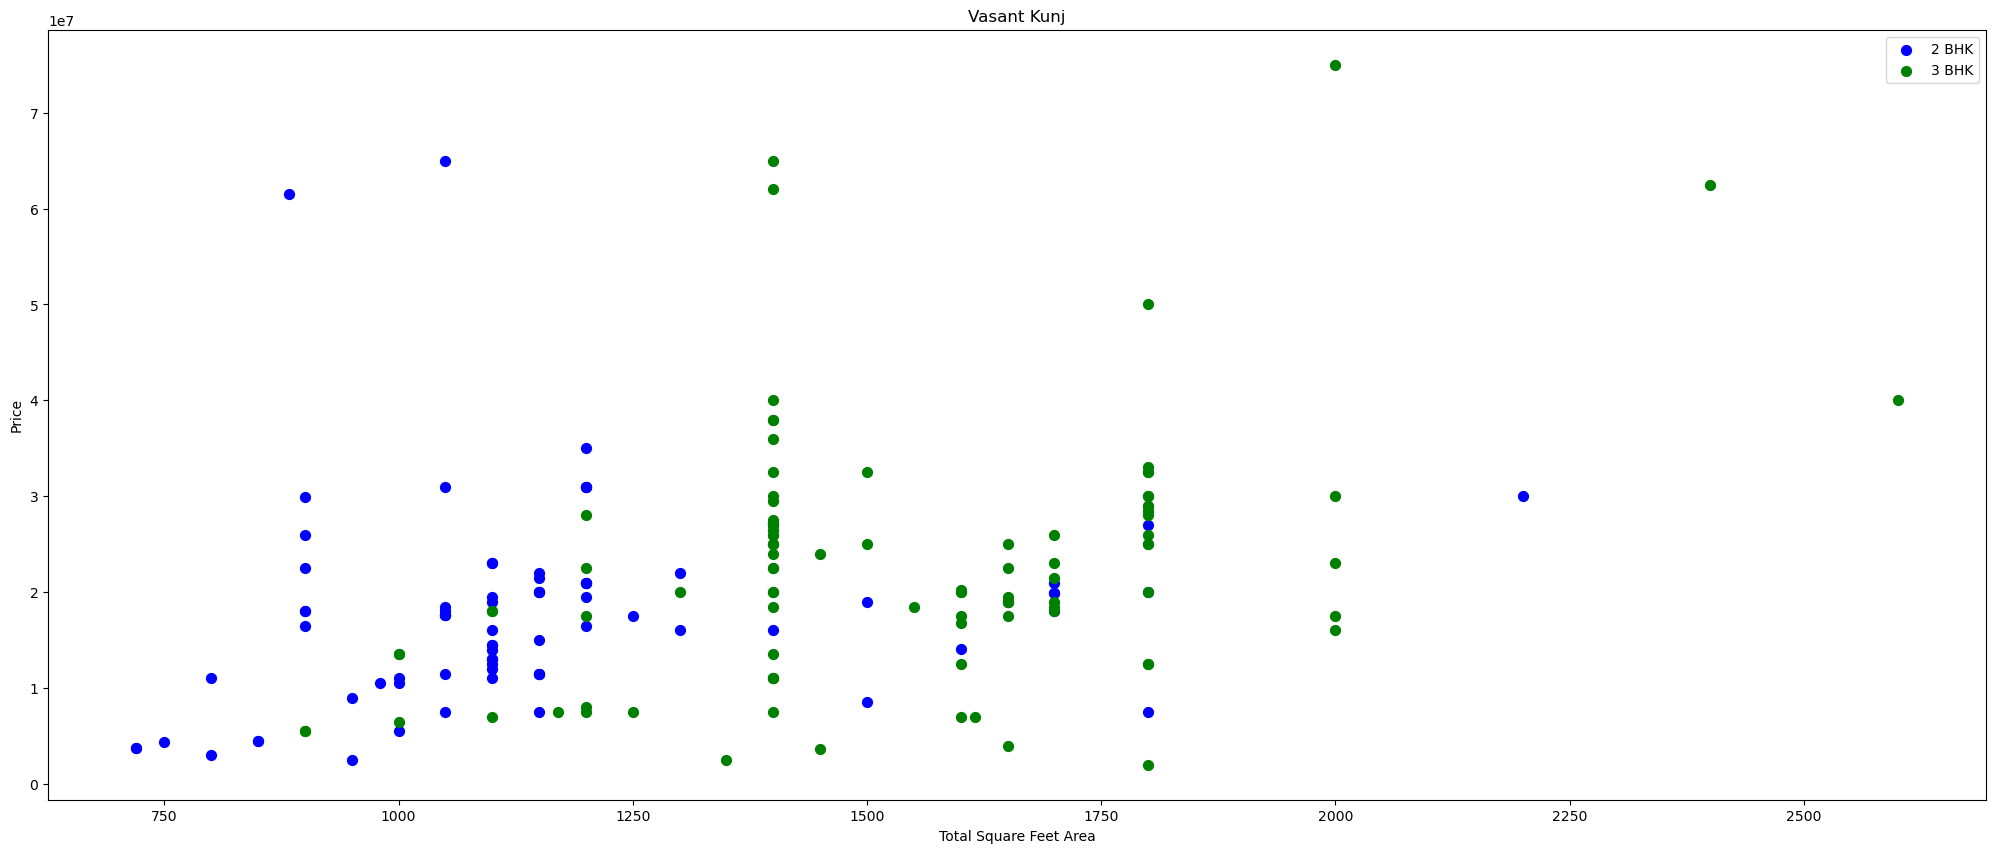

In [40]:
def plot_scatter_chart(df, Location):
    Bhk2 = df[(df.Location == Location) & (df.BHK == 2)]
    Bhk3 = df[(df.Location == Location) & (df.BHK == 3)]

    # Drop rows with missing Area or Price_per_sqft
    Bhk2 = Bhk2.dropna(subset=['Area', 'Price']) 
    Bhk3 = Bhk3.dropna(subset=['Area', 'Price'])

    plt.rcParams['figure.figsize'] = (25, 10)
    plt.scatter(Bhk2.Area, Bhk2.Price, color="Blue", label="2 BHK", s=50)
    plt.scatter(Bhk3.Area, Bhk3.Price, color="Green", label="3 BHK", s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(Location)
    plt.legend()
    plt.show()

plot_scatter_chart(df6, "Vasant Kunj")

In [41]:
#To remove outliers or inconsistent data points, particularly with respect to price per square foot (price_per_sqft) across different BHK (bedroom)
#types in the same location. So, if a 3 BHK apartment is priced cheaper per square foot than a 2 BHK (in the same location and roughly same area), 
#that might indicate a data anomaly or outlier.

{
  '1': {'mean': 4000, 'std': 2000, 'count': 34},
  '2': {'mean': 4300, 'std': 2300, 'count': 22}
}


{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [42]:
#Removes outlier rows where a higher BHK apartment has a lower price per sqft than the average price per sqft of a smaller BHK apartment in the 
#same location.
# Parameters: df (DataFrame): DataFrame containing at least 'location', 'bhk', and 'price_per_sqft' columns.
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    # Group by location
    for location, location_df in df.groupby('Location'):
        Bhk_stats = {}
        # Step 1: Calculate mean, std, count for each BHK in the location
        for Bhk, Bhk_df in location_df.groupby('BHK'):
            Bhk_stats[Bhk] = {
                'mean': np.mean(Bhk_df.Price_per_sqft),
                'std': np.std(Bhk_df.Price_per_sqft),
                'count': Bhk_df.shape[0]
            }
        # Step 2: Compare each BHK with the previous one (e.g., 2 BHK vs 1 BHK)
        for Bhk, Bhk_df in location_df.groupby('BHK'):
            stats = Bhk_stats.get(Bhk - 1)
            if stats and stats['count'] > 5:
                # Identify 2 BHK flats with price less than mean price/sqft of 1 BHK
                outliers = Bhk_df[Bhk_df.Price_per_sqft < stats['mean']]
                exclude_indices = np.append(exclude_indices, outliers.index.values)

    return df.drop(exclude_indices, axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(2430, 12)

In [43]:
df7.head()

,Price,Area,Location,No. of Bedrooms,Resale,Maintenance Staff,Gymnasium,Swimming Pool,Gardens,Track,BHK,Price_per_sqft
0,15500000,1200,Alaknanda,3,1,0,0,0,0,0,3,12916.7
2,15600000,1300,Alaknanda,2,1,0,0,0,0,0,2,12000.0
3,19000000,1450,Alaknanda,3,1,0,0,0,0,0,3,13103.4
4,19000000,1450,Alaknanda,3,1,0,0,0,0,0,3,13103.4
5,15000000,1200,Alaknanda,2,1,0,0,0,0,0,2,12500.0


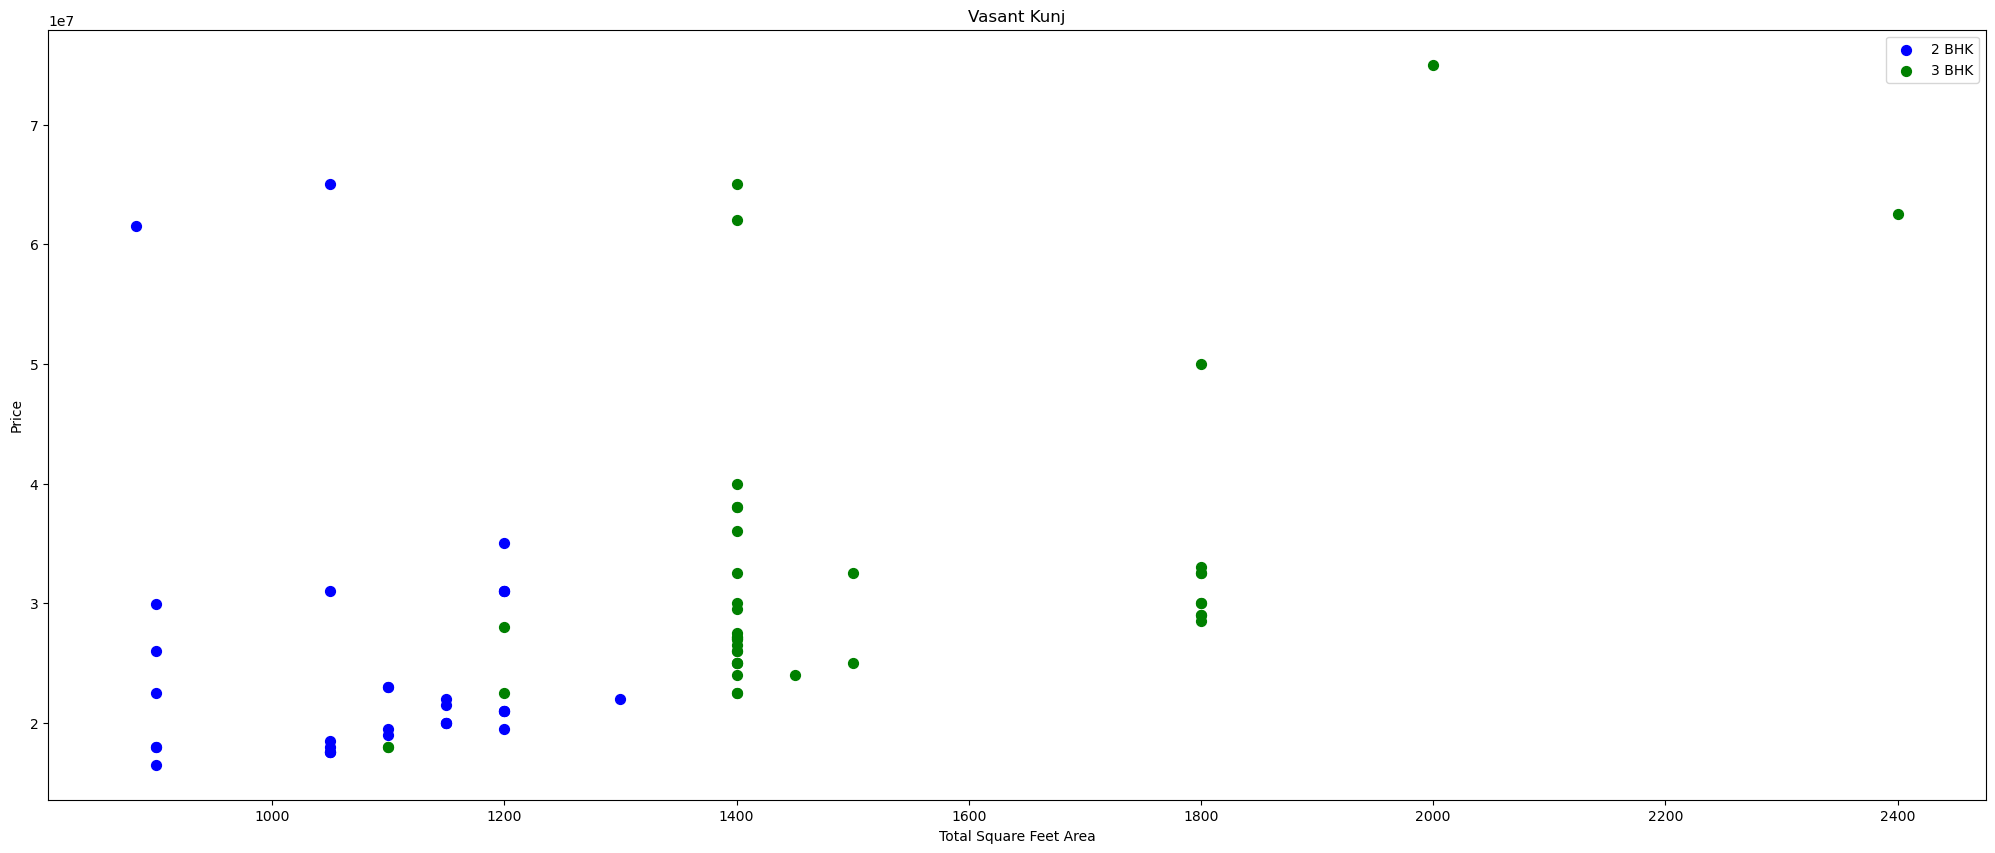

In [44]:
plot_scatter_chart(df7, "Vasant Kunj")

Text(0, 0.5, 'Count')

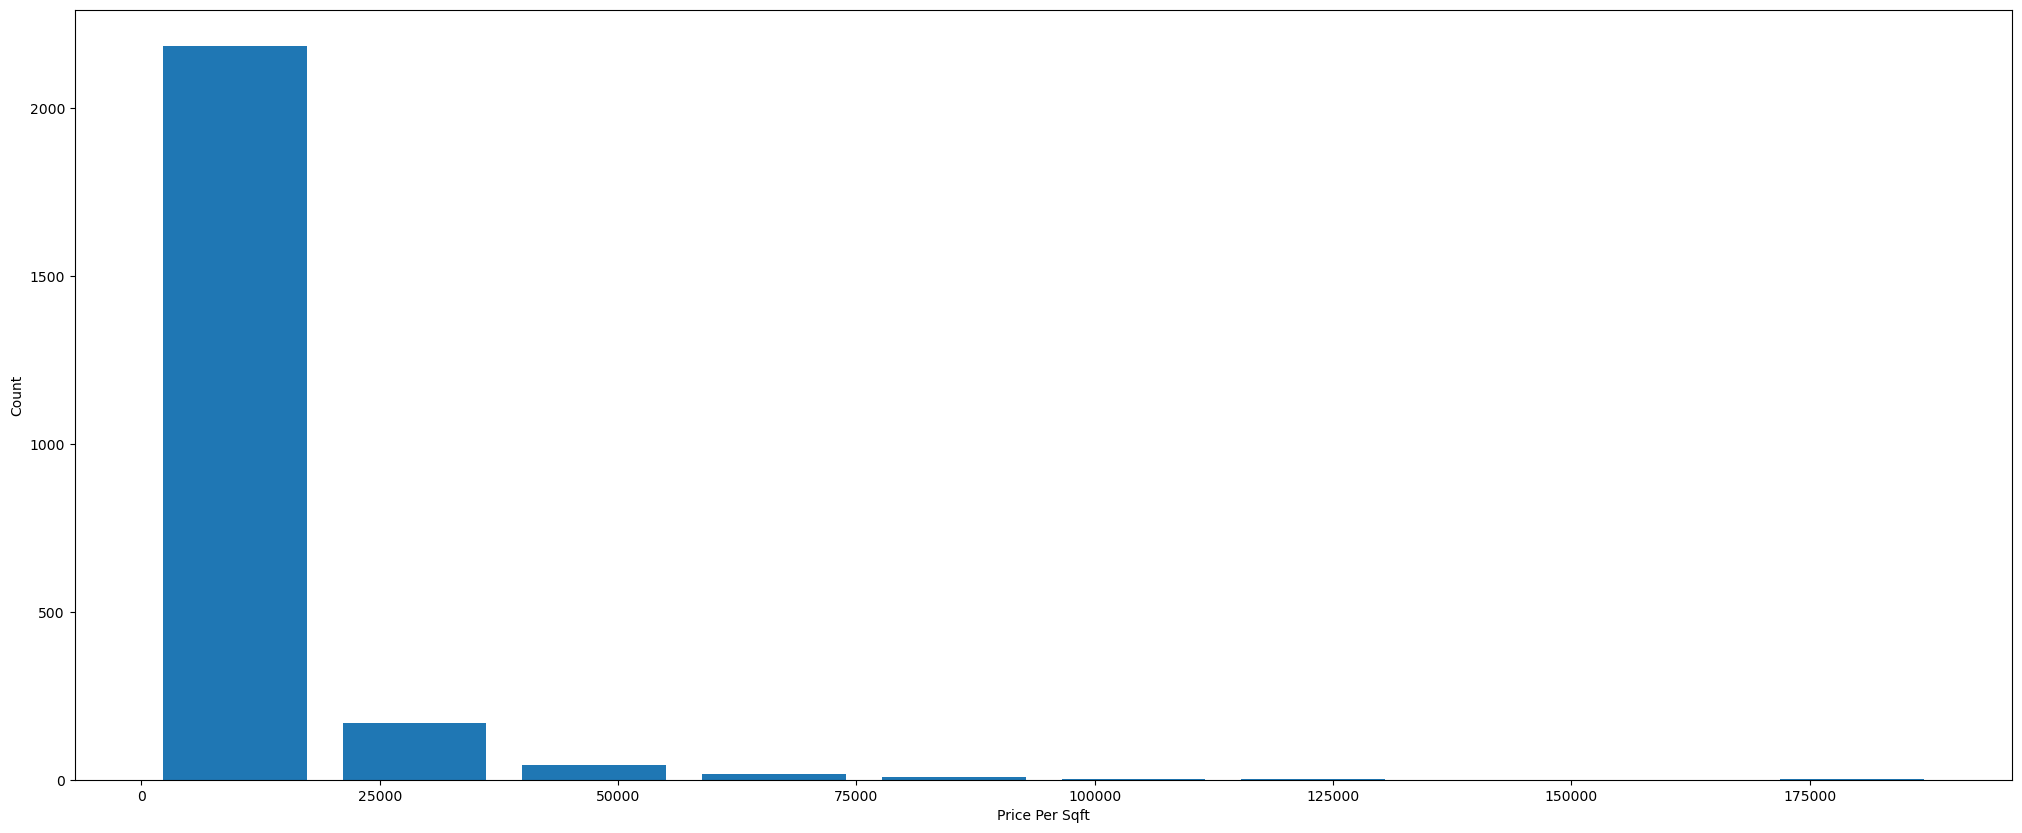

In [45]:

plt.rcParams["figure.figsize"] = (25,10)
plt.hist(df7.Price_per_sqft, rwidth= 0.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")

In [46]:
df7.Gymnasium.unique()

array([0, 9, 1], dtype=int64)

In [47]:
df7[df7.Gymnasium > 3] 

,Price,Area,Location,No. of Bedrooms,Resale,Maintenance Staff,Gymnasium,Swimming Pool,Gardens,Track,BHK,Price_per_sqft
40,21000000,1550,Alaknanda,3,1,9,9,9,9,9,3,13548.4
44,19500000,1150,Alaknanda,3,1,9,9,9,9,9,3,16956.5
45,20500000,1350,Alaknanda,3,1,9,9,9,9,9,3,15185.2
47,19900000,1150,Alaknanda,3,1,9,9,9,9,9,3,17304.3
48,19000000,1150,Alaknanda,2,1,9,9,9,9,9,2,16521.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4054,2800000,900,West Punjabi Bagh,2,1,9,9,9,9,9,2,3111.1
4061,4500000,900,nawada,3,1,9,9,9,9,9,3,5000.0
4062,5100000,900,nawada,3,1,9,9,9,9,9,3,5666.7
4063,2300000,900,nawada,3,1,9,9,9,9,9,3,2555.6


Text(0, 0.5, 'Count')

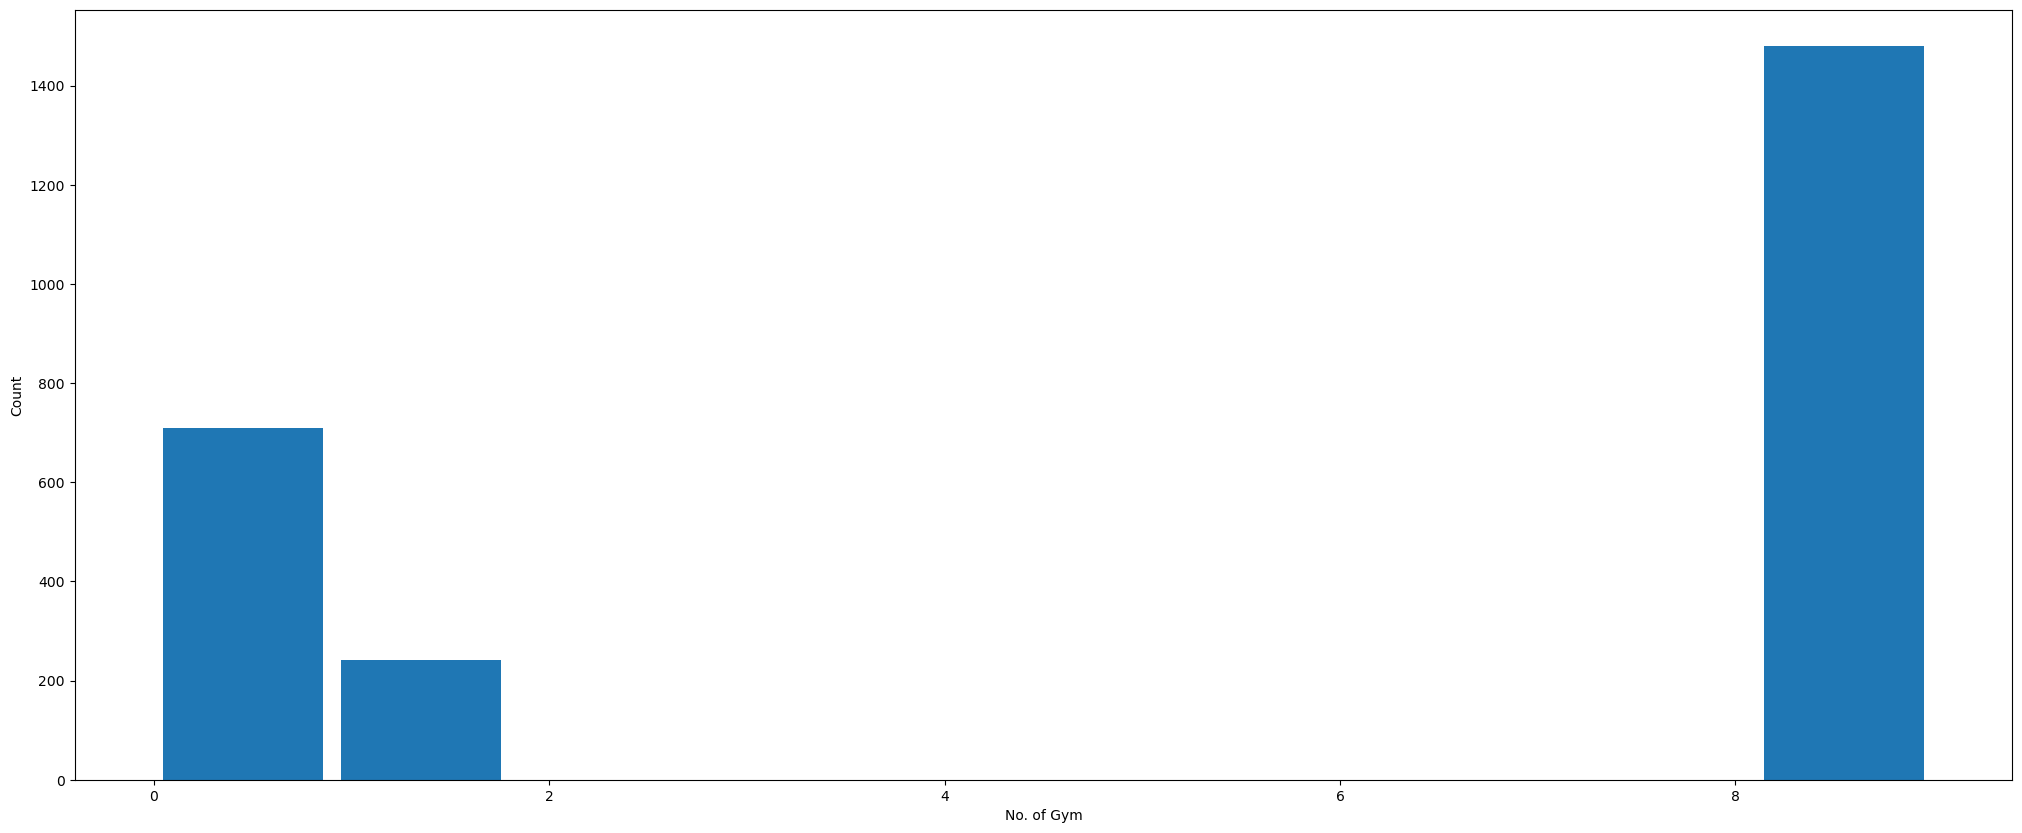

In [48]:
plt.hist(df7.Gymnasium, rwidth = 0.9)
plt.xlabel("No. of Gym")
plt.ylabel("Count")

In [49]:
df7[df7.Gymnasium>df7.BHK+2]

,Price,Area,Location,No. of Bedrooms,Resale,Maintenance Staff,Gymnasium,Swimming Pool,Gardens,Track,BHK,Price_per_sqft
40,21000000,1550,Alaknanda,3,1,9,9,9,9,9,3,13548.4
44,19500000,1150,Alaknanda,3,1,9,9,9,9,9,3,16956.5
45,20500000,1350,Alaknanda,3,1,9,9,9,9,9,3,15185.2
47,19900000,1150,Alaknanda,3,1,9,9,9,9,9,3,17304.3
48,19000000,1150,Alaknanda,2,1,9,9,9,9,9,2,16521.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4054,2800000,900,West Punjabi Bagh,2,1,9,9,9,9,9,2,3111.1
4061,4500000,900,nawada,3,1,9,9,9,9,9,3,5000.0
4062,5100000,900,nawada,3,1,9,9,9,9,9,3,5666.7
4063,2300000,900,nawada,3,1,9,9,9,9,9,3,2555.6


In [50]:
df8 = df7[~(df7.Gymnasium>df7.BHK+2)]
df8.shape

(960, 12)

In [51]:
df9 = df8.drop(['No. of Bedrooms','Resale','Maintenance Staff','Swimming Pool','Gardens','Track','Price_per_sqft'], axis = 1)

In [52]:
df9.head()

,Price,Area,Location,Gymnasium,BHK
0,15500000,1200,Alaknanda,0,3
2,15600000,1300,Alaknanda,0,2
3,19000000,1450,Alaknanda,0,3
4,19000000,1450,Alaknanda,0,3
5,15000000,1200,Alaknanda,0,2


In [53]:
df9.shape

(960, 5)

In [54]:
#ML algorithm cannnot take text data as input

In [55]:
#getting dummy variable 
dummies = pd.get_dummies(df9.Location, dtype=int)
dummies.head(3)

,Alaknanda,Bindapur,Burari,Chattarpur,Chittaranjan Park,Dwarka Mor,Govindpuri,Greater Kailash,Hari Nagar,Jamia Nagar,...,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Shahdara,Shanti Park Dwarka,Shastri Nagar,Uttam Nagar,Vasant Kunj,West End,nawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Concat function adds the two datasets
df10 = pd.concat([df9, dummies.drop('nawada', axis = 'columns')], axis = 'columns')

In [57]:
df10.head(3)

,Price,Area,Location,Gymnasium,BHK,Alaknanda,Bindapur,Burari,Chattarpur,Chittaranjan Park,...,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Shahdara,Shanti Park Dwarka,Shastri Nagar,Uttam Nagar,Vasant Kunj,West End
0,15500000,1200,Alaknanda,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15600000,1300,Alaknanda,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19000000,1450,Alaknanda,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = df10.drop('Location', axis = 'columns')
df11.head(3)

,Price,Area,Gymnasium,BHK,Alaknanda,Bindapur,Burari,Chattarpur,Chittaranjan Park,Dwarka Mor,...,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Shahdara,Shanti Park Dwarka,Shastri Nagar,Uttam Nagar,Vasant Kunj,West End
0,15500000,1200,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15600000,1300,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19000000,1450,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11.shape

(960, 58)

Model Building

In [61]:
#Independent variable is X and dependent variable is y (Price)
x = df11.drop('Price', axis='columns')
x.head()

,Area,Gymnasium,BHK,Alaknanda,Bindapur,Burari,Chattarpur,Chittaranjan Park,Dwarka Mor,Govindpuri,...,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Shahdara,Shanti Park Dwarka,Shastri Nagar,Uttam Nagar,Vasant Kunj,West End
0,1200,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1300,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1450,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1450,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df11.Price
y.head()

0    15500000
2    15600000
3    19000000
4    19000000
5    15000000
Name: Price, dtype: int64

In [63]:
#We split the datasets into two parts - train and test. Train is used to calculate model parameters(beta) and test data is used to check model 
#performance. #Train is 80% of the data and test is 20% of the data 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() ## Create a LinearRegression model instance
lr_clf.fit(x_train, y_train) # Train the model using training data
lr_clf.score(x_test, y_test) # Evaluate model performance (R² score)

0.6467906699434873

In [65]:
#We use K-fold cross validation for the best optimal model selection

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y, cv=cv)

array([ 0.78018755,  0.62261211,  0.42641028,  0.40734407, -0.03039896])

In [67]:
#Since the Price variable is not normally distributed(Right Skewed) we use log transformation to get better results.

In [68]:

# Apply log transformation to the Price column (target variable)
df11['log_price'] = np.log(df11['Price'])
df11.head(3)

,Price,Area,Gymnasium,BHK,Alaknanda,Bindapur,Burari,Chattarpur,Chittaranjan Park,Dwarka Mor,...,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Shahdara,Shanti Park Dwarka,Shastri Nagar,Uttam Nagar,Vasant Kunj,West End,log_price
0,15500000,1200,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.556351
2,15600000,1300,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.562781
3,19000000,1450,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16.759950


In [185]:
x = df11.drop(['Price', 'log_price'], axis='columns')  # Drop original target columns from features
y = df11['log_price']                          # Use log-transformed target
x.head(3)

,Area,Gymnasium,BHK,Alaknanda,Bindapur,Burari,Chattarpur,Chittaranjan Park,Dwarka Mor,Govindpuri,...,Sector 6 Dwarka,Sector 7 Dwarka,Sector 9 Dwarka,Sector-18 Dwarka,Shahdara,Shanti Park Dwarka,Shastri Nagar,Uttam Nagar,Vasant Kunj,West End
0,1200,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1300,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1450,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y.head()

0    16.556351
2    16.562781
3    16.759950
4    16.759950
5    16.523561
Name: log_price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Model
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)

# R^2 score on log-transformed target
lr_clf.score(x_test, y_test)


0.8492074973381882

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
cross_val_score(LinearRegression(),x,y, cv=cv)

array([0.82672399, 0.84835656, 0.81471658, 0.87222252, 0.86887944])

In [73]:
#Applying different regressions to check the optimal one

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns = ['model','best_score','best_params'])
    
find_best_model_using_gridsearchcv(x, y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_

,model,best_score,best_params
0,linear_regression,0.846180,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.606911,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.883204,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [75]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],  
                'positive': [True, False]  
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
   
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
    
find_best_model_using_gridsearchcv(x, y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_

,model,best_score,best_params
0,linear_regression,0.846180,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.606911,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.884622,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [292]:
#Since decision tree has the best score we use it as a model.
from sklearn.tree import DecisionTreeRegressor

# Best parameters from the output
best_params = {'criterion': 'friedman_mse', 'splitter': 'random'}

final_model = DecisionTreeRegressor(**best_params)

final_model.fit(x, y)


DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = final_model.predict(x)

print("R² Score:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


R² Score: 0.9934828293328369
MAE: 0.027881050275689583
RMSE: 0.062023016808949345


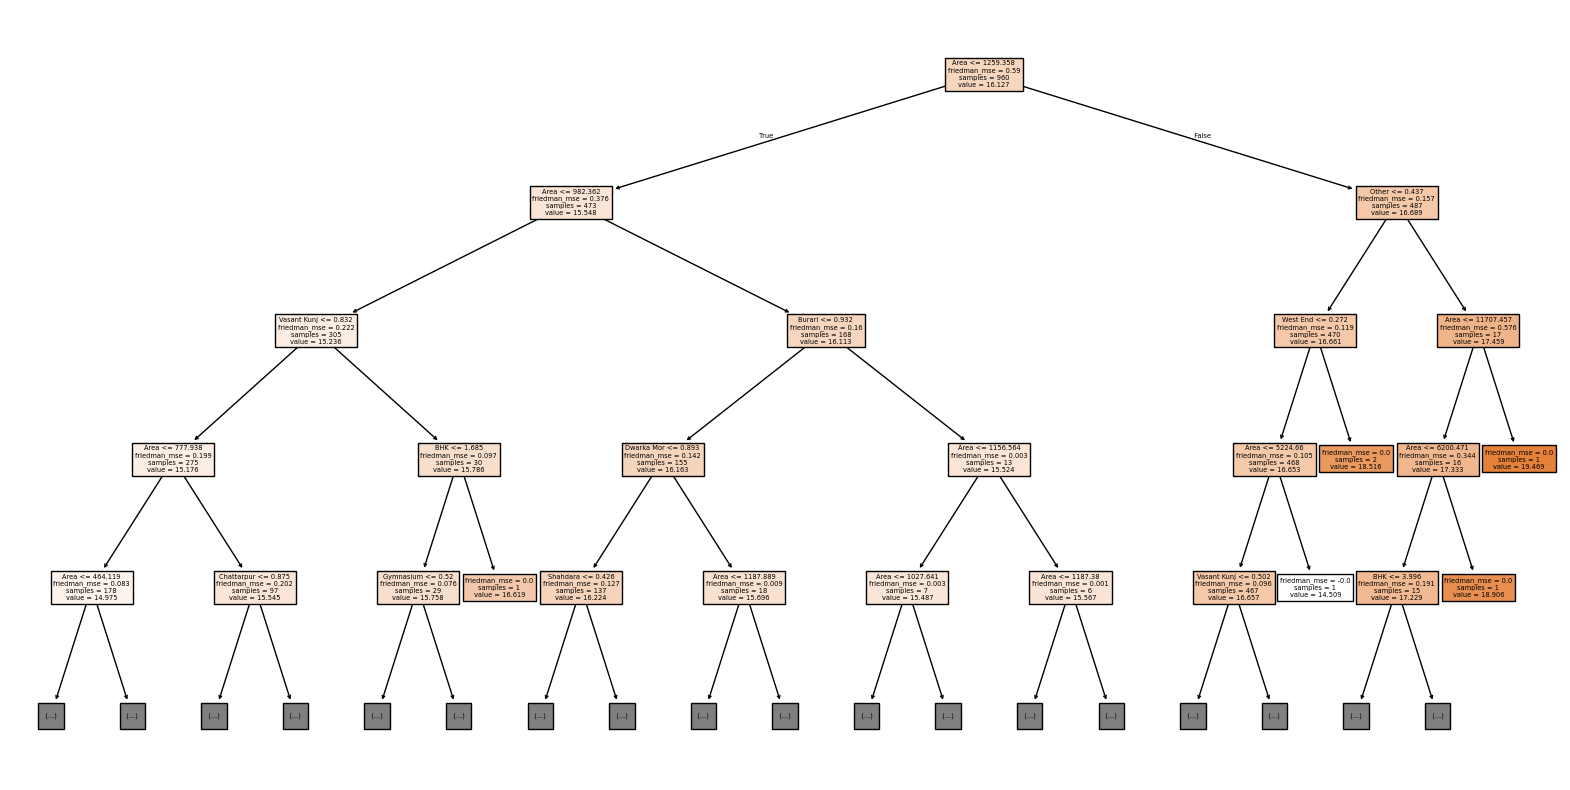

In [78]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(final_model, filled=True, feature_names=x.columns, max_depth = 4)
plt.show()


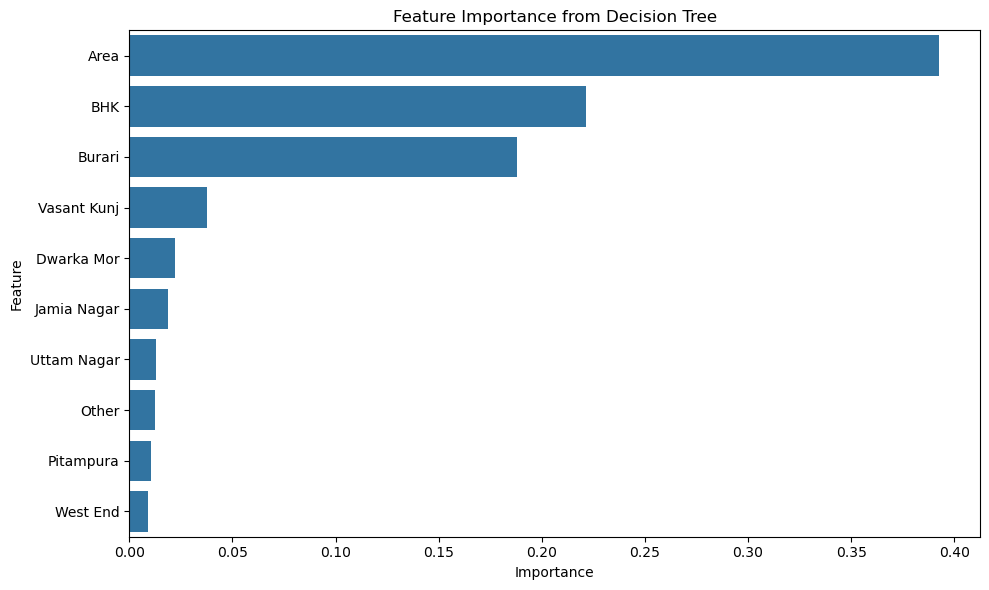

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract importances and create a DataFrame
importances = final_model.feature_importances_
feature_names = x.columns

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
plt.show()



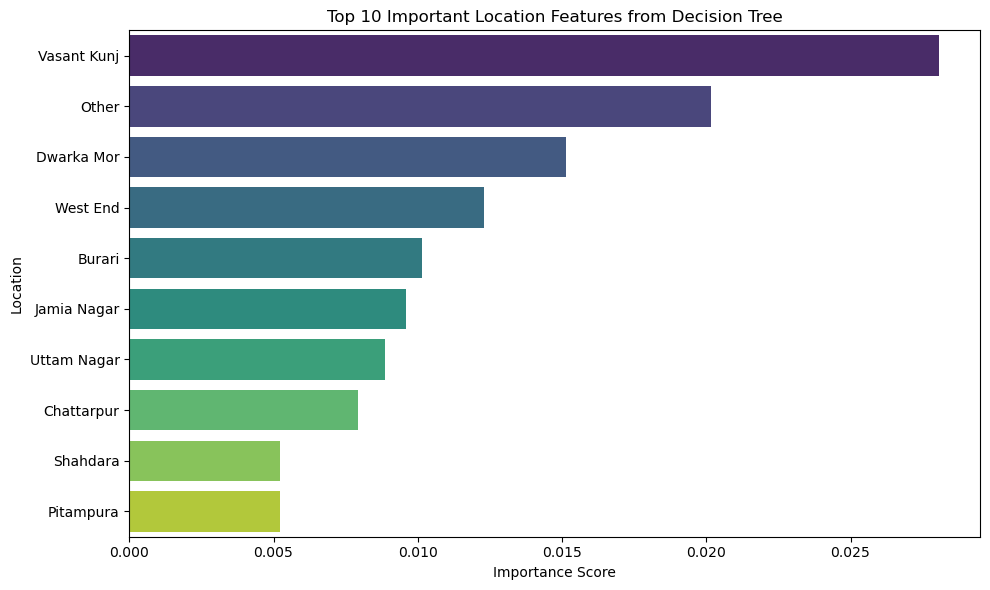

In [282]:
importances = final_model.feature_importances_
feature_names = x.columns

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Filter only location features (assuming they are of dtype 'int32')
location_features = x.select_dtypes(include='int32').columns
location_importance_df = feat_importance_df[feat_importance_df['Feature'].isin(location_features)]

#Get top 10 locations by importance
top10_locations = location_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue = 'Feature', data=top10_locations, palette='viridis', legend=False)
plt.title('Top 10 Important Location Features from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


In [284]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x, y)


DecisionTreeRegressor()

In [286]:
def predict_price_dt(location, area, gymnasium, bhk):
    
    loc_index = np.where(x.columns == location)[0][0]

    x_input = np.zeros(len(x.columns))
    x_input[0] = area
    x_input[1] = gymnasium
    x_input[2] = bhk
    if loc_index >= 0:
        x_input[loc_index] = 1

    return dt_model.predict([x_input])[0]


In [280]:
predict_price_dt('Uttam Nagar', 1000, 1, 2)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


16.25785759333348

However we can decide to continue with Linear Regression as well

In [163]:
#Linear Regression
x.columns

Index(['Area', 'Gymnasium', 'BHK', 'Alaknanda', 'Bindapur', 'Burari',
       'Chattarpur', 'Chittaranjan Park', 'Dwarka Mor', 'Govindpuri',
       'Greater Kailash', 'Hari Nagar', 'Jamia Nagar', 'Jasola', 'Kalkaji',
       'Mahavir Enclave', 'Mansa Ram Park', 'Mayur Vihar', 'Mayur Vihar II',
       'Mundka', 'Other', 'Palam', 'Paschim Vihar', 'Pitampura',
       'Punjabi Bagh', 'Rohini Sector 9', 'Rohini sector 24', 'Sainik Farms',
       'Saket', 'Sarita Vihar', 'Sector 10 Dwarka', 'Sector 11 Dwarka',
       'Sector 12 Dwarka', 'Sector 13 Dwarka', 'Sector 13 Rohini',
       'Sector 17 Dwarka', 'Sector 18A Dwarka', 'Sector 19 Dwarka',
       'Sector 2 Dwarka', 'Sector 22 Dwarka', 'Sector 22 Rohini',
       'Sector 23 Dwarka', 'Sector 23 Rohini', 'Sector 24 Rohini',
       'Sector 3 Dwarka', 'Sector 4 Dwarka', 'Sector 5 Dwarka',
       'Sector 6 Dwarka', 'Sector 7 Dwarka', 'Sector 9 Dwarka',
       'Sector-18 Dwarka', 'Shahdara', 'Shanti Park Dwarka', 'Shastri Nagar',
       'Uttam Naga

In [169]:
np.where(x.columns == 'Chittaranjan Park')[0][0]

7

In [216]:
x_columns = x.columns

In [288]:
def predict_price(Location, Area, Gymnasium, BHK):
    x = np.zeros(len(x_columns))  # Use x_columns instead of x.columns
    x[0] = Area
    x[1] = Gymnasium
    x[2] = BHK
    
   
    if Location in x_columns:
        loc_index = np.where(x_columns == Location)[0][0]
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]


In [290]:
predict_price('Uttam Nagar',1000,1,2)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


14.966633182526568

In [268]:
import os 
os.getcwd()

'C:\\Users\\HP'

In [266]:
predict_price('Vasant Kunj', 3000, 1, 5)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


17.961315821478152

In [298]:
#Ignore the warning - as long as order of features is correct.